<a href="https://colab.research.google.com/github/mariafadilla15/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Modul 9 - Morfologi**

Maria Fadilla



# **Praktikum**

## 1. Import Folder Drive

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Import Library

In [164]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 3. Dilasi dengan Strel (SED) tanpa Library

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV.

In [165]:
# Read Image
img_1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Week9/images/plat nomer.jpg')

if img_1 is None:
    print('Could not open or find the image.')
    exit(0)

In [166]:
def dilate(image, kernel):
  # Convert to grayscale
  # image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  # value k & constant diubah, biar bisa dipake buat function opening
  kernel_size, _ = kernel.shape # _ gak dipake, karena kernel selalu persegi, k_size saja sudah cukup
  pad_size = kernel_size // 2 # tadinya (k_size - 1), balikin klo hasil beda.

  # Get image size
  height = image.shape[0]
  width = image.shape[1]

  # Initialize the dilated image
  dilated = np.zeros_like(image)
  # dilated = np.zeros((height  + 2 * pad_size, width + 2 * pad_size), dtype=np.uint8)

  # Perform dilation
  # Rumus lama pake static value 1, bukan pad size
  for i in range(pad_size, height - pad_size):
    for j in range(pad_size, width - pad_size):
      # Tadinya beberapa pake + 2 karena pad_size = 1 dan dijumlah + 1, hence + 2.
      # pad_size balikin ke + 1 kalo ga bisa2 pake rumus ini
      dilated_pixel_formula = image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
      dilated_pixel = dilated_pixel_formula * kernel # tadinya + kernel bkn dilated
      # replacing dilated back to kernel seems to be working
      dilated[i, j] = np.max(dilated_pixel)

  return dilated

[[0 1 0]
 [1 1 1]
 [0 1 0]]


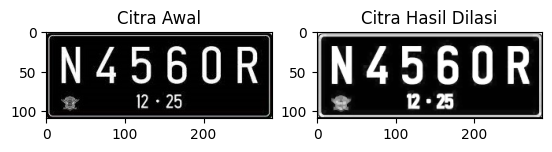

In [167]:
# Cross-shaped kernel
kernel_3x3 = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype = np.uint8)

# Square 3x3 kernel
# testing error
#kernel_3x3 = np.ones((3, 3), dtype=np.uint8)

# Pemanggilan function dilation
output = dilate(img_1, kernel_3x3)

print(kernel_3x3)
plt.subplot(121), plt.imshow(img_1), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output, cmap = 'gray'), plt.title('Citra Hasil Dilasi')
plt.show()

## 4. Dilasi dengan Strel (SED) dengan Library

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV.

[[0 1 0]
 [1 1 1]
 [0 1 0]]


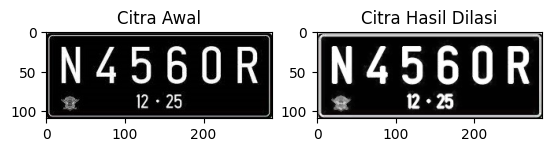

In [168]:
# Cross-shaped kernel (structuring element)
kernel_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Dilasi menggunakan function cv2.dilate()
output = cv2.dilate(img_1, kernel_cross_3x3, iterations = 1)

print(kernel_cross_3x3)
plt.subplot(121), plt.imshow(img_1), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Dilasi')
plt.show()

## 5. Erosi dengan Strel (SE) tanpa Library

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

In [172]:
def erode(image, kernel):
  # Convert image to grayscale
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  # Image size
  height = image.shape[0]
  width = image.shape[1]

  # value k & constant diubah, agar bisa dipakai untuk function opening
  kernel_size, _ = kernel.shape # _ tidak dipakai, karena kernel selalu persegi, k_size saja sudah cukup
  pad_size = kernel_size // 2 # tadinya (k_size - 1), balikin klo hasil beda.

  # Inisialisasi Image Erosi
  eroded = np.zeros_like(image)

  # Looping Erosi
  for i in range(pad_size, height - pad_size):
    for j in range(pad_size, width - pad_size):
        eroded_pixel_formula = image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
        eroded_pixel = eroded_pixel_formula * kernel
        eroded[i, j] = np.min(eroded_pixel)

  # Convert eroded to grayscale, delete if causing errors
  # eroded = cv.cvtColor(eroded, cv.COLOR_BGR2GRAY)
  return eroded

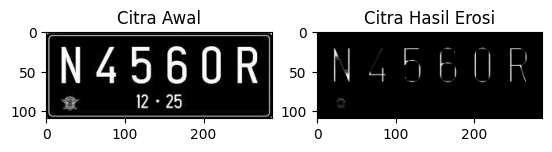

In [173]:
# Kernel square 5x5
kernel_5x5 = np.ones((5, 5), dtype = np.uint8)

# Pemanggilan function erosi
output = erode(img_1, kernel_5x5)

plt.subplot(121), plt.imshow(img_1), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output, cmap = 'gray'), plt.title('Citra Hasil Erosi') # cmap =  'gray' untuk mengubah output grayscale sesuai plt
plt.show()

## 6. Erosi dengan Strel (SE) dengan Library

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

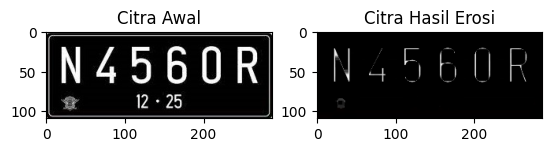

In [174]:
# Kernel square 5x5
kernel_5x5 = np.ones((5, 5), dtype = np.uint8)

# Erosi menggunakan function cv.erode()
output = cv2.erode(img_1, kernel_5x5, iterations = 1)

plt.subplot(121), plt.imshow(img_1), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Erosi')
plt.show()

## 7. Opening dengan Strel berbentuk square 3x3

Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: Operasi Opening Menggunakan tanpa Library Morphology

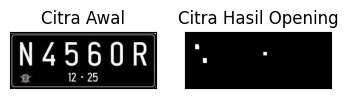

In [175]:
# operasi opening tanpa library morphology

# Menentukan ambang dan menghasilkan citra biner
reto, thresho = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

# Menentukan kernel untuk erosi dan dilasi
k = 7
kernel = np.ones((k, k), np.uint8)

# Melakukan erosi dan dilasi
erosion = cv2.erode(thresho, kernel, iterations=1)
dilation = cv2.dilate(erosion, kernel, iterations=1)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilation, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()


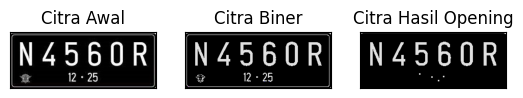

In [176]:
# Operasi Opening Menggunakan Library Morphology

ret, thresh = cv2.threshold(img_1, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img_1,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])

plt.show()

## 8. Operasi Closing dengan Strel Square 3 x 3

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV.

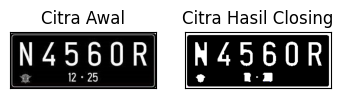

In [177]:
#operasi closing tanpa library morphology

# Ambang citra
retc, threshc = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

# Menentukan ukuran kernel
k = 7
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (k, k))

# Melakukan dilasi diikuti oleh erosi (Closing)
closing = cv2.morphologyEx(threshc, cv2.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

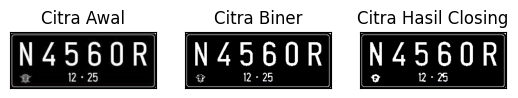

In [178]:
#operasi closing menggunakan library morphology

# Ambang citra
ret, thresh = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

# Menentukan ukuran kernel
kernel = np.ones((3, 3), np.uint8)

# Melakukan penutupan (closing)
closs = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closs, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

## 9. Operasi Dilasi dengan Strel Cross 3 x 3 dan 5 x 5

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

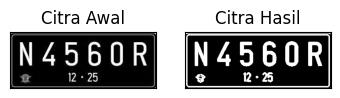

In [183]:
# Cross 3x3

def dilasi_citra_cross_3x3(F):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    SED = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)
    w = 3
    constant1 = (w - 1) // 2

    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

ret, thresh = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

# Ubah ke citra grayscale jika tidak sudah
gray_thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding untuk menghasilkan citra biner
ret, binarized_thresh = cv2.threshold(gray_thresh, 127, 255, cv2.THRESH_BINARY)

imgD_cross_3x3 = dilasi_citra_cross_3x3(binarized_thresh)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgD_cross_3x3, cmap='gray')
plt.title('Citra Hasil'), plt.xticks([]), plt.yticks([])

plt.show()

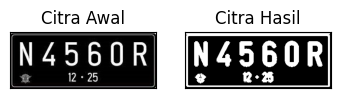

In [185]:
# Cross 5x5

def dilasi_citra_cross_5x5(F):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    SED = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)
    w = 5
    constant1 = (w - 1) // 2

    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

ret, thresh = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

# Ubah ke citra grayscale jika tidak sudah
gray_thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding untuk menghasilkan citra biner
ret, binarized_thresh = cv2.threshold(gray_thresh, 127, 255, cv2.THRESH_BINARY)

imgD_cross_5x5 = dilasi_citra_cross_5x5(binarized_thresh)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgD_cross_5x5, cmap='gray')
plt.title('Citra Hasil'), plt.xticks([]), plt.yticks([])

plt.show()

## 10. Operasi Dilasi dengan Strel Circular 3 x 3 dan 5 x 5

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5.

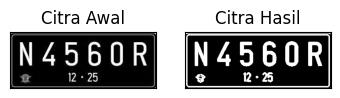

In [186]:
# Circular 3x3

def dilasi_citra_circular_3x3(F):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    constant1 = 1

    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

ret, thresh = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

# Ubah ke citra grayscale jika tidak sudah
gray_thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding untuk menghasilkan citra biner
ret, binarized_thresh = cv2.threshold(gray_thresh, 127, 255, cv2.THRESH_BINARY)

imgD_circular_3x3 = dilasi_citra_circular_3x3(binarized_thresh)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgD_circular_3x3, cmap='gray')
plt.title('Citra Hasil'), plt.xticks([]), plt.yticks([])

plt.show()

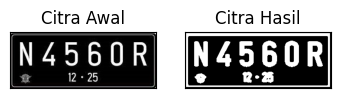

In [188]:
# Circular 5x5

def dilasi_citra_circular_5x5(F):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    constant1 = 2

    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

ret, thresh = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

# Ubah ke citra grayscale jika tidak sudah
gray_thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding untuk menghasilkan citra biner
ret, binarized_thresh = cv2.threshold(gray_thresh, 127, 255, cv2.THRESH_BINARY)

imgD_circular_5x5 = dilasi_citra_circular_5x5(binarized_thresh)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgD_circular_5x5, cmap='gray')
plt.title('Citra Hasil'), plt.xticks([]), plt.yticks([])

plt.show()

## 11. Operasi Erosi dengan Strel Rectangle 3 x 5 dan 5 x 7

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7.

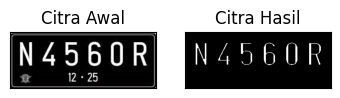

In [190]:
# Strel Rectangle 3x5

def erosi_citra_rectangle_3x5(F):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
    constant1 = 2
    constant2 = 1
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant1, m - constant1):
        for j in range(constant2, n - constant2):
            temp = F[i - constant1:i + constant1 + 1, j - constant2:j + constant2 + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

ret, thresh = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

# Ubah ke citra grayscale jika tidak sudah
gray_thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding untuk menghasilkan citra biner
ret, binarized_thresh = cv2.threshold(gray_thresh, 127, 255, cv2.THRESH_BINARY)

imgE_rectangle_3x5 = erosi_citra_rectangle_3x5(binarized_thresh)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgE_rectangle_3x5, cmap='gray')
plt.title('Citra Hasil'), plt.xticks([]), plt.yticks([])

plt.show()

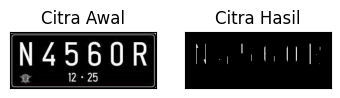

In [191]:
# Strel Rectangle 5x7

def erosi_citra_rectangle_5x7(F):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))
    constant1 = 3
    constant2 = 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant1, m - constant1):
        for j in range(constant2, n - constant2):
            temp = F[i - constant1:i + constant1 + 1, j - constant2:j + constant2 + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

ret, thresh = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

# Ubah ke citra grayscale jika tidak sudah
gray_thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding untuk menghasilkan citra biner
ret, binarized_thresh = cv2.threshold(gray_thresh, 127, 255, cv2.THRESH_BINARY)

imgE_rectangle_5x7 = erosi_citra_rectangle_5x7(binarized_thresh)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgE_rectangle_5x7, cmap='gray')
plt.title('Citra Hasil'), plt.xticks([]), plt.yticks([])

plt.show()

## 12. Operasi Erosi dengan Strel Line Vertikal 3 dan 5

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5.

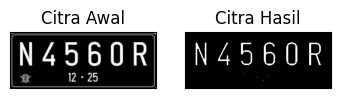

In [210]:
# Strel Line Vertikal 3

def erosi_citra_line_vertikal_3(F):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 1))
    constant = 1
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

ret, thresh = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

imgE_line_vertikal_3 = erosi_citra_line_vertikal_3(thresh)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgE_line_vertikal_3, cmap='gray')
plt.title('Citra Hasil'), plt.xticks([]), plt.yticks([])

plt.show()

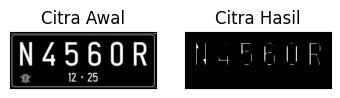

In [211]:
# Strel Line Vertikal 5

def erosi_citra_line_vertikal_5(F):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
    constant = 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

ret, thresh = cv2.threshold(img_1, 127, 255, cv2.THRESH_BINARY)

imgE_line_vertikal_5 = erosi_citra_line_vertikal_5(thresh)

plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgE_line_vertikal_5, cmap='gray')
plt.title('Citra Hasil'), plt.xticks([]), plt.yticks([])

plt.show()

## 13. TopHat

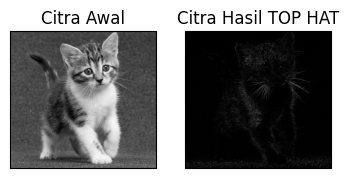

In [232]:
# Read the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Week9/images/kitten01.jpg', 0)

# Define the kernel for Top-Hat
filter_size = (4, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Perform Top-Hat operation
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Display the original and Top-Hat images
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])

plt.show()

## 14. BLACKHAT

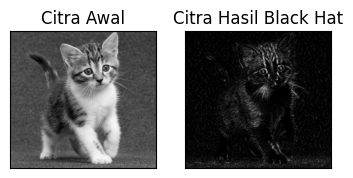

In [224]:
# Read the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Week9/images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the kernel for Black-Hat
filter_size = (13, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filter_size)

# Perform Black-Hat operation
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Display the original and Black-Hat images
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(blackhat, cmap='gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])

plt.show()

## 15. Skeleton

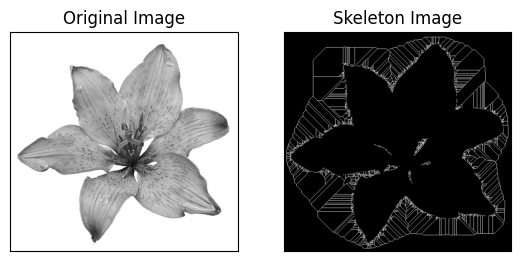

In [236]:
from skimage import filters
from skimage.morphology import skeletonize

# Read the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Week9/images/lily.jpg', 0)

# Apply thresholding using Triangle method
binary = img > filters.threshold_triangle(img)

# Convert True/False to 1/0
binary_cp = binary.astype(int)

# Skeletonize the binary image
skeleton = skeletonize(binary_cp)

# Display images
plt.figure(figsize=(10, 5))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary_and_skeleton.png")
plt.show()

## 16. Skeleton Inverse

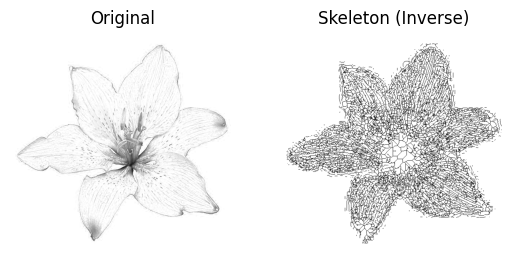

In [240]:
# Apply thresholding using Triangle method
binary = img < filters.threshold_triangle(img)

# Skeletonize the binary image
skeleton = skeletonize(binary)

# Create subplots
fig, ax = plt.subplots(1, 2)

# Plot the original image
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Inverse the colormap to display white as foreground
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('Skeleton (Inverse)')
ax[1].axis('off')

plt.show()


## 17. Thickening

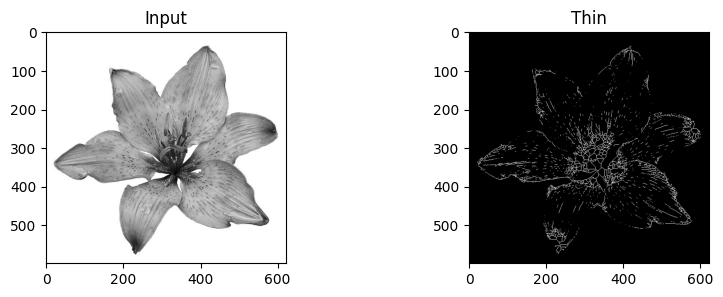

In [242]:
from skimage import img_as_float
from skimage import io, color, morphology

# Read the image
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/Colab Notebooks/Week9/images/lily.jpg')))

# Apply thresholding to create a binary image
image_binary = image < 0.5

# Perform skeletonization and thinning
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

# Create subplots
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()

# **Tugas Praktikum**

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

In [256]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random
from sklearn.cluster import KMeans
import math

In [257]:
def convert_to_binary(image):
    # Konversi gambar ke dalam citra grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan fungsi thresholding dengan flag THRESH_OTSU
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

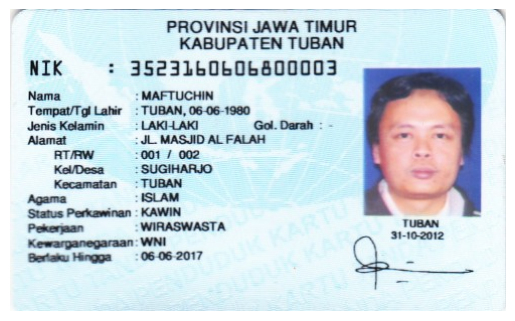

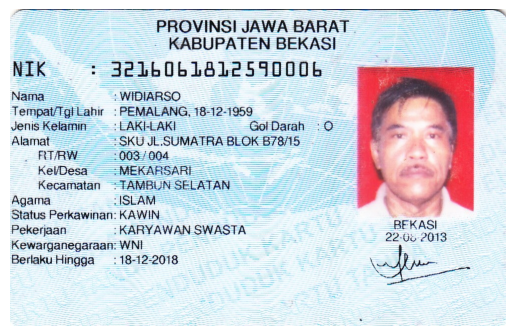

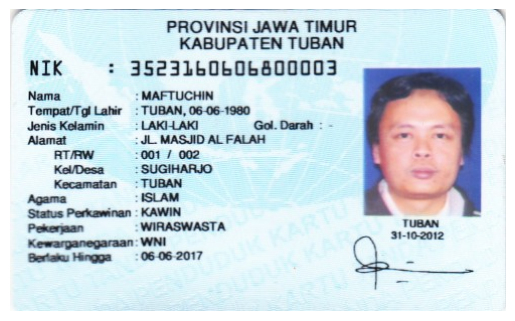

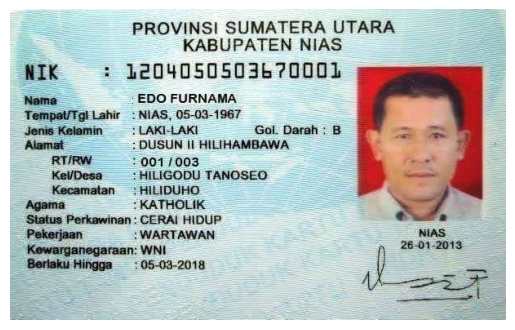

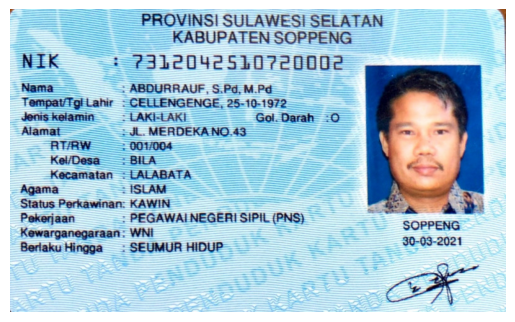

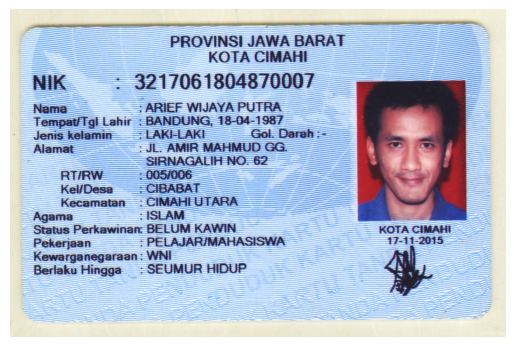

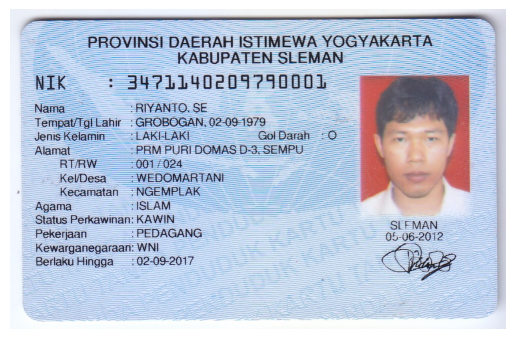

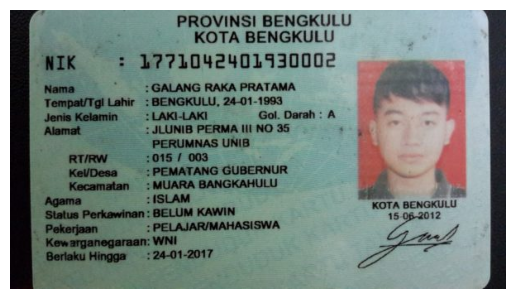

In [258]:
ktp_image_directory = '/content/drive/MyDrive/Colab Notebooks/Week9/KTP'
image_files = [file for file in os.listdir(ktp_image_directory) if file.endswith((".jpg", ".jpeg", ".png"))]

for img_file in image_files:
    img_path = os.path.join(ktp_image_directory, img_file)
    img = cv2.imread(img_path)

    # Tampilkan gambar
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

## Dilasi

<ipython-input-265-dd2bf030a9a6>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


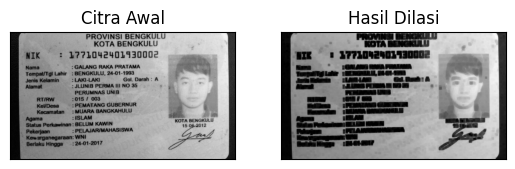

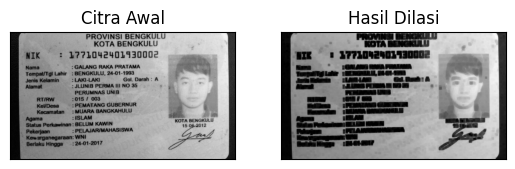

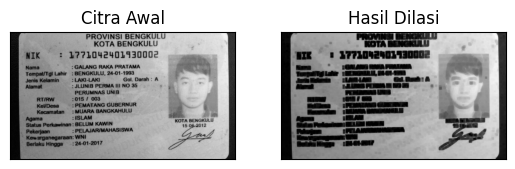

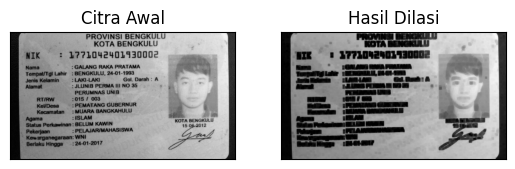

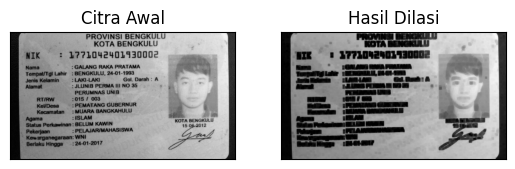

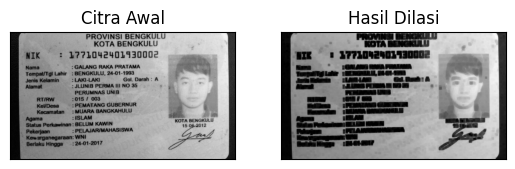

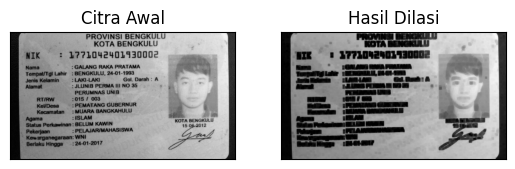

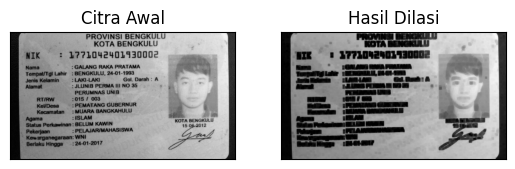

In [265]:
# Mengambil File dari direktori
image_files = [file for file in os.listdir(ktp_image_directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Ukuran SE
k = 5

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp_image_directory, img_file)

    # SE dengan ukuran sesuai yang diinginkan
    SE = np.ones((k, k), np.uint8)

    # Operasi Dilasi
    img_eroded = cv2.erode(img, SE, iterations=1)

    # Tampilkan hasil Dilasi
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_eroded, cmap='gray')
    plt.title('Hasil Dilasi'), plt.xticks([]), plt.yticks([])
    plt.show()

## Erosi

<ipython-input-268-94154baf5418>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


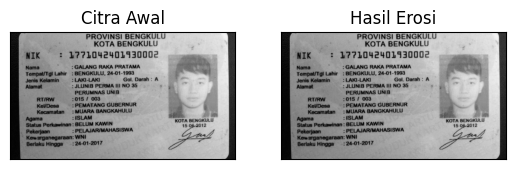

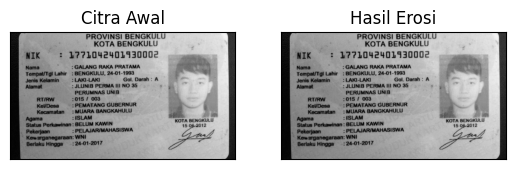

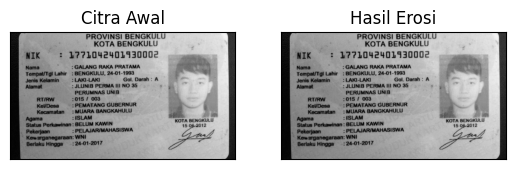

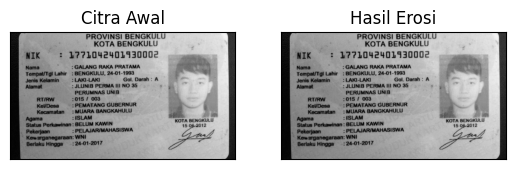

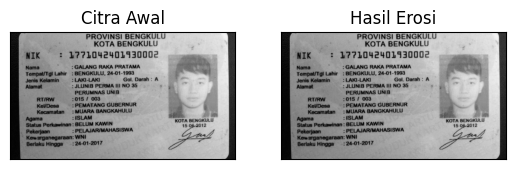

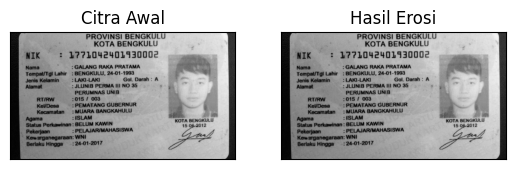

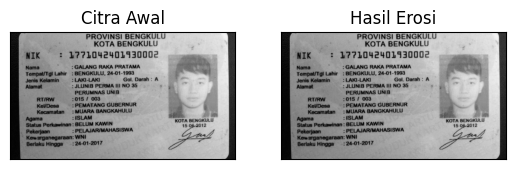

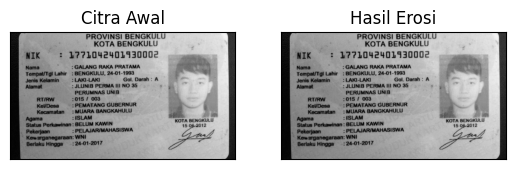

In [268]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp_image_directory, img_file)

    # Tentukan ukuran Structuring Element (SE) untuk Erosi (misalnya, square 3x3)
    k = 1
    SE = np.ones((k, k), np.uint8)

    # Operasi Erosi
    img_dilated = cv2.dilate(img, SE, iterations=1)

    # Tampilkan hasil Erosi
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_dilated, cmap='gray')
    plt.title('Hasil Erosi'), plt.xticks([]), plt.yticks([])
    plt.show()

## Opening

<ipython-input-269-55c2695a4404>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


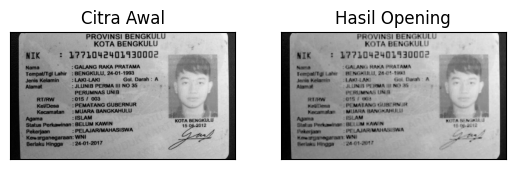

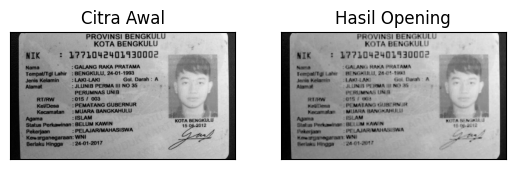

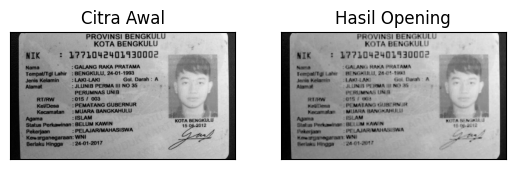

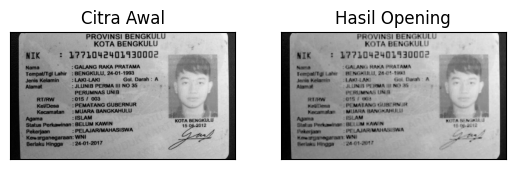

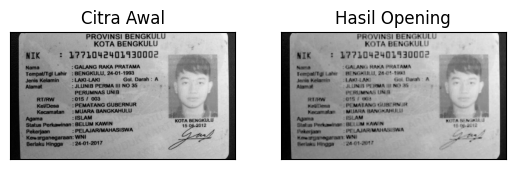

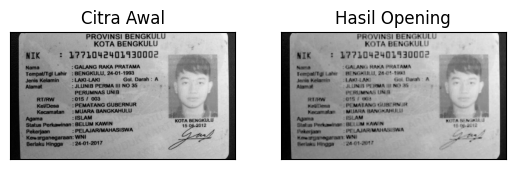

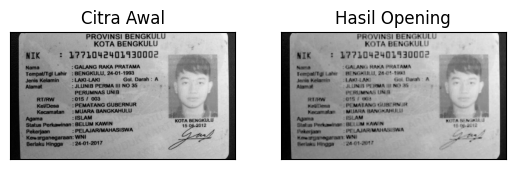

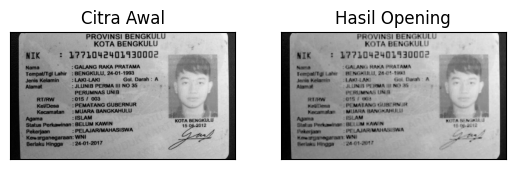

In [269]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp_image_directory, img_file)

    # Tentukan ukuran Structuring Element (SE) untuk Opening (misalnya, square 3x3)
    k_Opening = 3
    SE_Opening = np.ones((k_Opening, k_Opening), np.uint8)

    # Operasi Opening
    img_closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, SE_Opening)

    # Tampilkan hasil Opening
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_closed, cmap='gray')
    plt.title('Hasil Opening'), plt.xticks([]), plt.yticks([])
    plt.show()

## Closing

<ipython-input-270-cfb44d2c1a3c>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


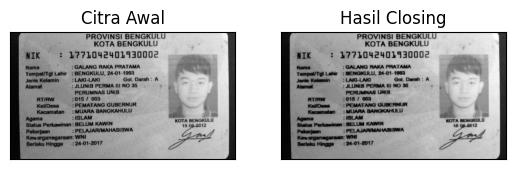

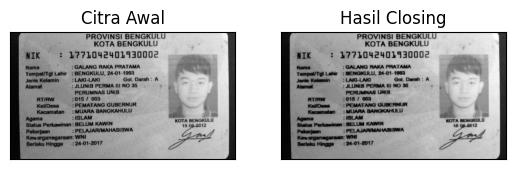

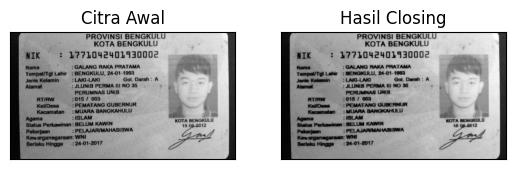

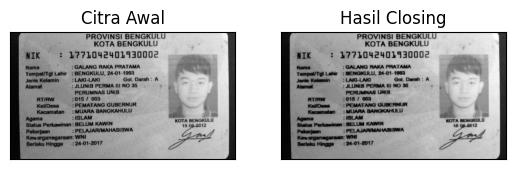

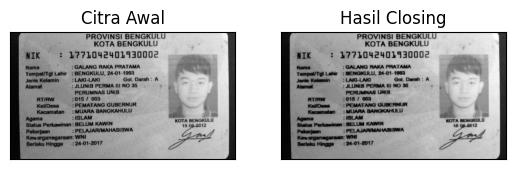

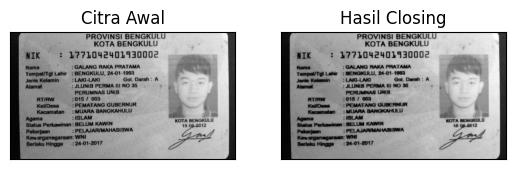

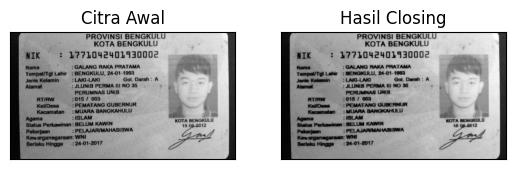

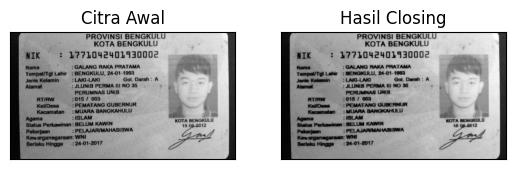

In [270]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp_image_directory, img_file)

    # Tentukan ukuran Structuring Element (SE) untuk Closing (misalnya, square 3x3)
    k_Closing = 3
    SE_Closing = np.ones((k_Closing, k_Closing), np.uint8)

    # Operasi Closing
    img_opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, SE_Closing)

    # Tampilkan hasil Closing
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_opened, cmap='gray')
    plt.title('Hasil Closing'), plt.xticks([]), plt.yticks([])
    plt.show()

## TopHat

<ipython-input-271-75704a255d4c>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


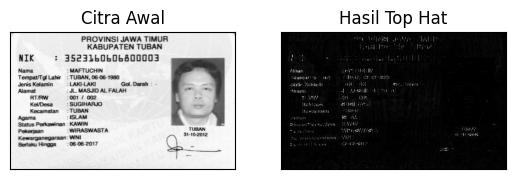

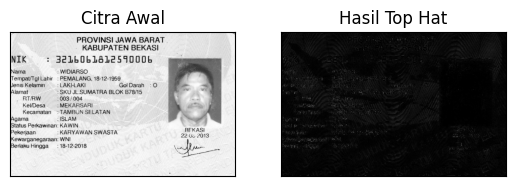

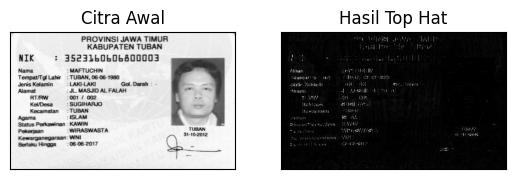

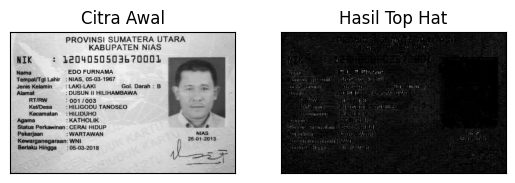

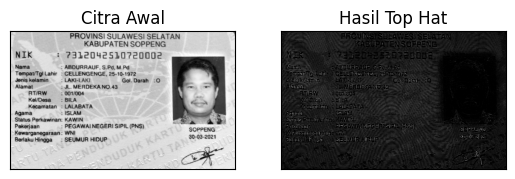

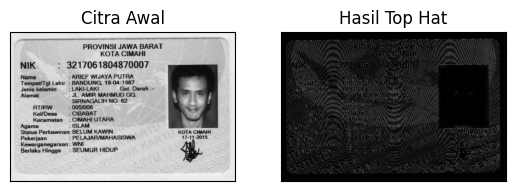

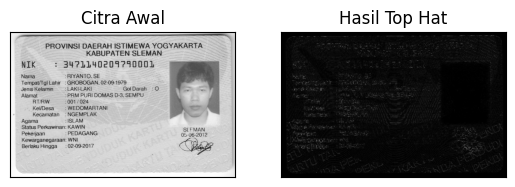

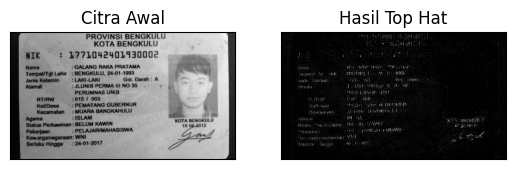

In [271]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp_image_directory, img_file)

    # Tentukan ukuran Structuring Element (SE) untuk Top Hat (misalnya, square 3x3)
    k_tophat = 3
    SE_tophat = np.ones((k_tophat, k_tophat), np.uint8)

    # Baca gambar sebagai citra grayscale
    img = cv2.imread(img_path, 0)

    # Operasi Top Hat
    img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, SE_tophat)

    # Tampilkan hasil Top Hat
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_tophat, cmap='gray')
    plt.title('Hasil Top Hat'), plt.xticks([]), plt.yticks([])
    plt.show()

## BlackHat

<ipython-input-272-d82efd0636cf>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


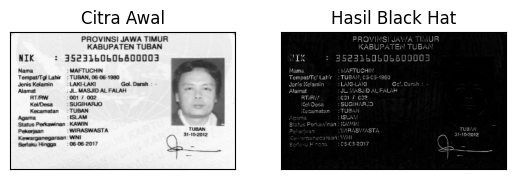

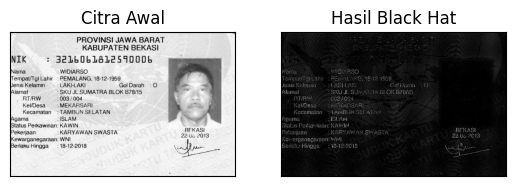

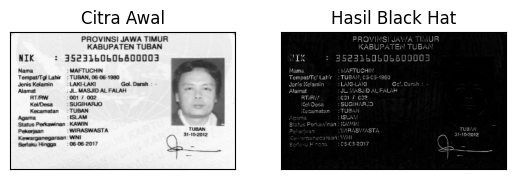

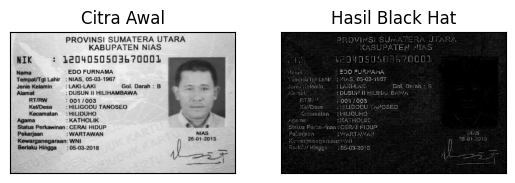

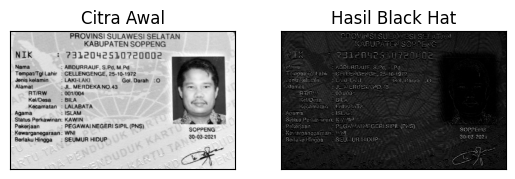

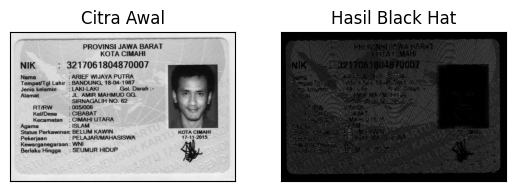

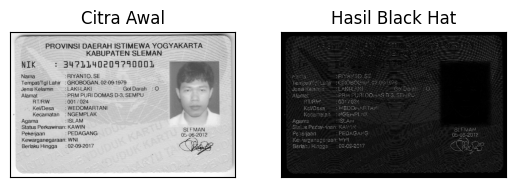

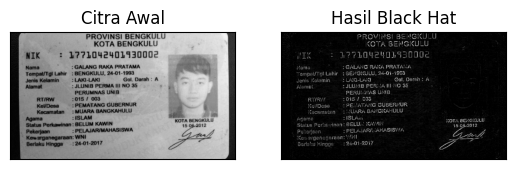

In [272]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp_image_directory, img_file)

    # Tentukan ukuran Structuring Element (SE) untuk Black Hat (misalnya, square 3x3)
    k_blackhat = 3
    SE_blackhat = np.ones((k_blackhat, k_blackhat), np.uint8)

    # Baca gambar sebagai citra grayscale
    img = cv2.imread(img_path, 0)

    # Operasi Black Hat
    img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, SE_blackhat)

    # Tampilkan hasil Black Hat
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_blackhat, cmap='gray')
    plt.title('Hasil Black Hat'), plt.xticks([]), plt.yticks([])
    plt.show()